# Plot 2D Grid
Plot the regridded data.
The grid is the average, minimum, maximum, or variance of all datapoints in its cell. \
The only exceptions are "counts" which shows the number of datapoints in the cell \
and "Top_Parameter" which shows the most common top parameter for all trajectories in the cell. \
Using the button "Fix colorbar over all levels" centers the colorbar around zero.

In [1]:
import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)

import panel as pn
import xarray as xr


from ad_sensitivity_analysis.interactive.project_map import plot_2dmap_interactive

pn.extension()

## Load data
You have to regrid the trajectories first. Please compile the CPP code with target `regrid` and execute it. You find more information in the README.

In [2]:
ds = xr.open_dataset(
    "/media/mahieron/Austausch/data/Z2_data_stats/grid_100_100_time_flow.nc",
    decode_times=False,
    engine="netcdf4",
)

## Plot the data

Column
    [0] Markdown(str)
    [1] RadioButtonGroup(button_type='primary', name='Kind', options=['Mean', 'Min', ...], value='Mean')
    [2] RadioButtonGroup(button_type='primary', name='Output Parameter', options=['QV', 'latent_heat', ...], value='QV')
    [3] Row
        [0] Select(name='Color according to', options=['NCCLOUD', 'NCGRAUPEL', ...], value='w')
        [1] Select(name='Colormap', options=['RdBu', 'viridis', ...], value='RdBu')
    [4] Row
        [0] Toggle(button_type='success', name='Fix colorbar o...)
        [1] Toggle(button_type='success', name='Use log colorbar')
        [2] Toggle(button_type='success', name='Adjust for Colorblind')
    [5] Row
        [0] IntSlider(end=15, name='Width in inches', start=3, value=9)
        [1] IntSlider(end=15, name='Height in inches', start=3, value=9)
        [2] FloatSlider(end=5, name='Scale fontsize', start=0.2, value=0.7)
    [6] FloatSlider(end=0, name='Log Threshold (..., start=-25, step=1)
    [7] Row
        [0] TextInput(value='Path/to/store/plot.png')
        [1] Button(button_type='primary', name='Save Plot')
        [2] Toggle(button_type='success', name='Latexify')
    [8] TextInput(name='Title')
    [9] Row
        [0] FloatSlider(end=100000.0, name='pressure', step=10000.0, value=70000.0)
        [1] IntSlider(end=71, name='timestep')
    [10] ParamFunction(function)
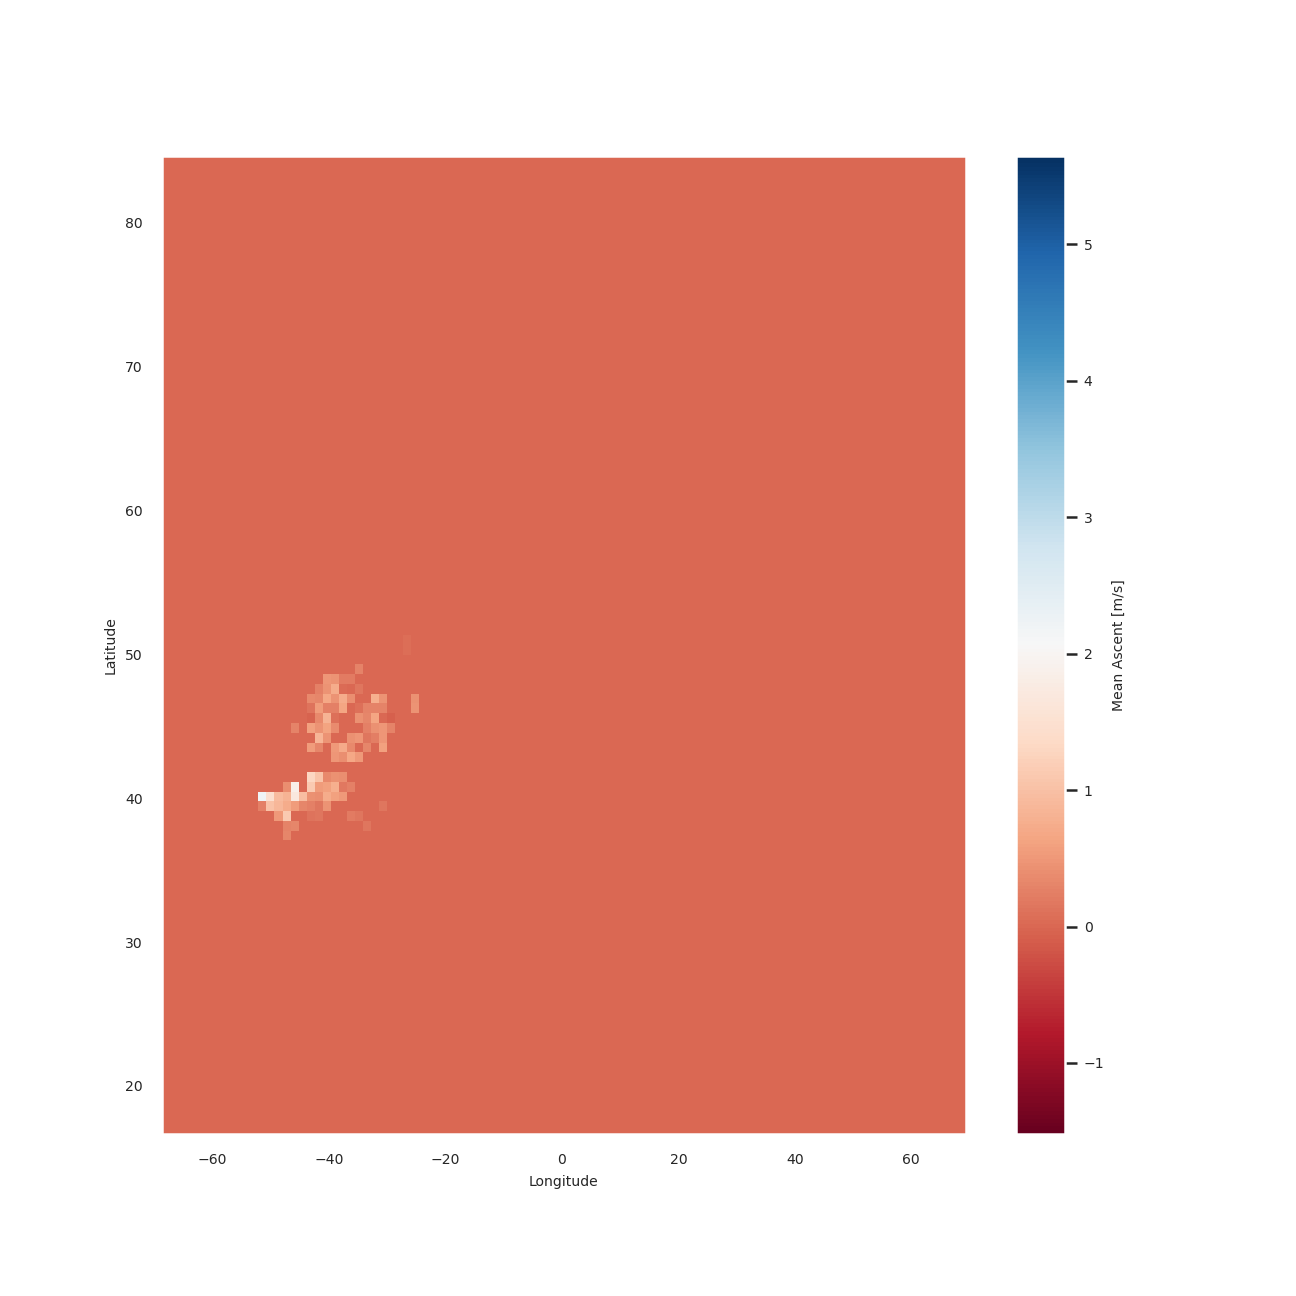

In [3]:
plot_2dmap_interactive(ds)